In [2]:
import numpy as np
import matplotlib.pyplot as plt
import trackpy as tp
from parameter_estimation import plot_parameter
from tracking import batch, track

<Figure size 640x480 with 0 Axes>

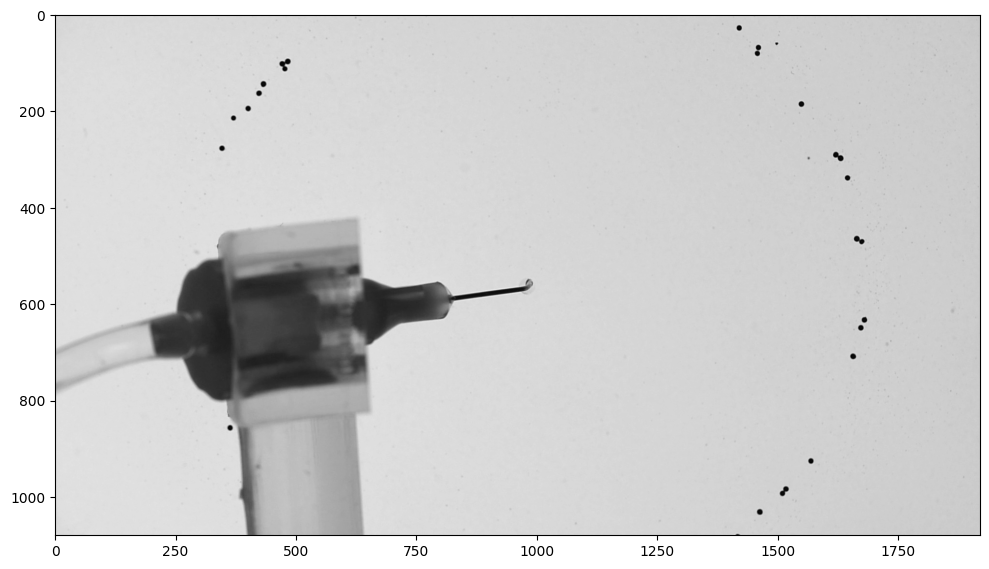

<Figure size 640x480 with 0 Axes>

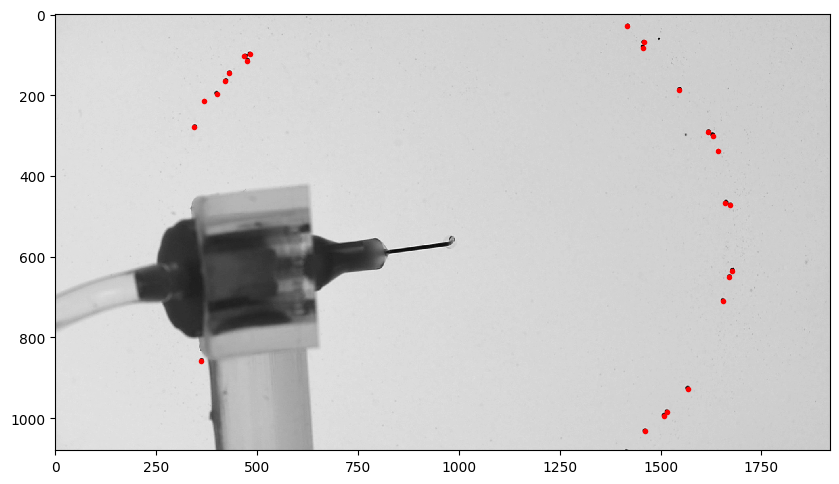

c:\Users\escud\Desktop\Marangoni\Code\marangoni-spreading\.venv\Lib\site-packages\trackpy\plots.py:638: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  axlist = f[pos_columns].applymap(lambda x: x % 1).hist()


<Figure size 640x480 with 0 Axes>

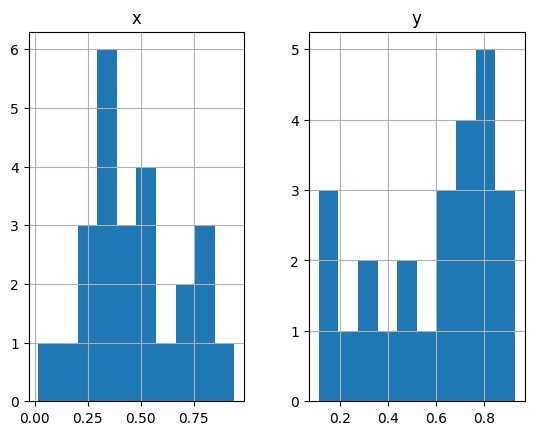

In [3]:
directory = "C:/Users/escud/Desktop/Marangoni/Videos/0306-Experiments/H=1cm_frames/"
last_frame = 500 # 1200 is max for this video
diameter = 11
mass = 2500

frames = plot_parameter(directory, particle_diameter=diameter, particle_minmass=mass, frame_number=last_frame)

In [4]:
output_path = "C:/Users/escud/Desktop/Marangoni/Videos/0306-Experiments/H=4cm_frames_output/"
raw_frames = batch(frames[:last_frame], particle_diameter=diameter, particle_minmass=mass, save_video=False, output_path=output_path)

Frame 499: 25 features


Frame 499: 25 trajectories present.


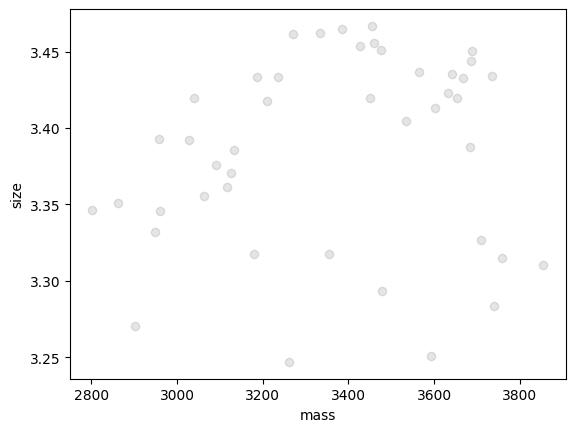

<Figure size 640x480 with 0 Axes>

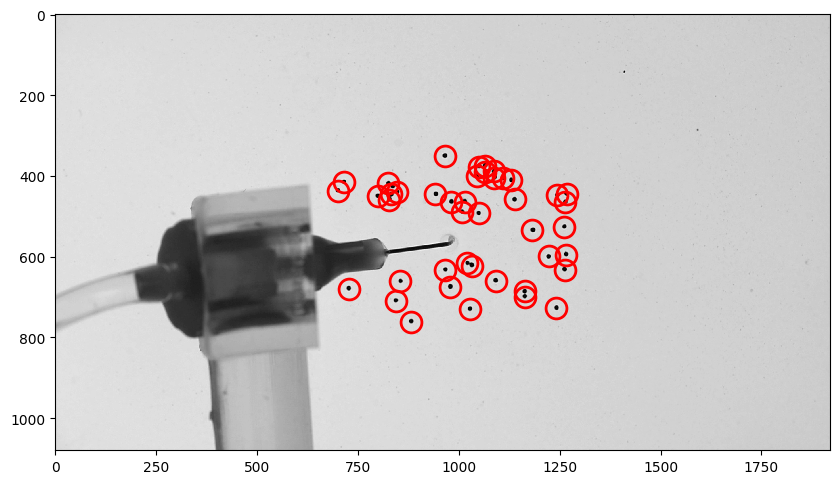

No-filter: 49
Pre-filter: 44
Filter: 44


In [5]:
status = True
filtered_trajectories = track(batched_frames=raw_frames, frames=frames[:last_frame], particle_diameter=diameter, particle_minmass=mass, filter_frame_number=100, save_video=status, output_path=output_path)

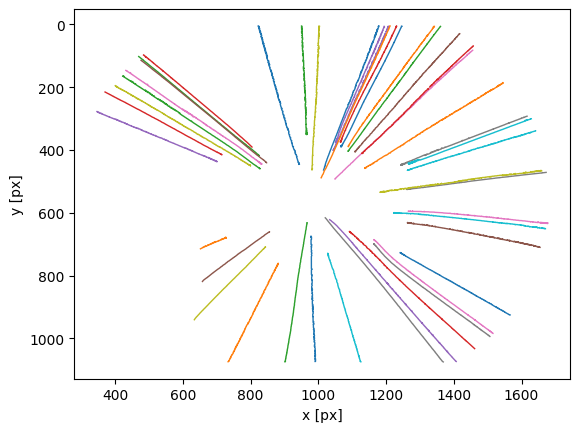

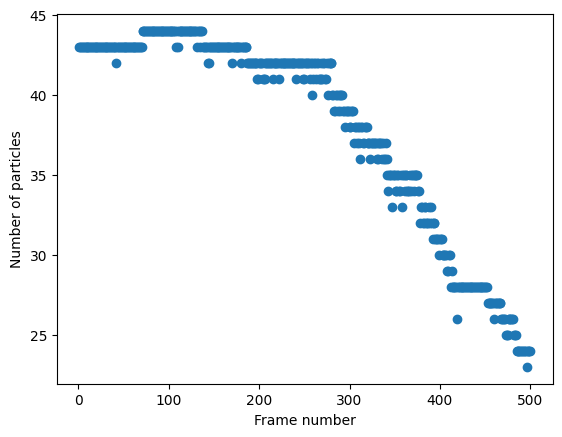

In [212]:
d = tp.compute_drift(filtered_trajectories)
tm = tp.subtract_drift(filtered_trajectories.copy(), d)
tm = filtered_trajectories ## ????
ax = tp.plot_traj(tm)
plt.show()

particles_per_frame = tm['frame'].value_counts().sort_index()
frame_number_array = np.linspace(1, len(particles_per_frame), len(particles_per_frame))
y_arr = tm['frame'].value_counts().sort_index()
plt.scatter(frame_number_array, y_arr)
plt.xlabel('Frame number')
plt.ylabel('Number of particles')

number_of_particles_max = max(particles_per_frame)

In [224]:
len(tm[tm['particle'] == 0])

281

In [226]:
tm[tm['particle'] == 0].iloc[280]

y            1073.284389
x             990.553987
mass         2661.178899
size            3.279032
ecc             0.168809
signal         57.252740
raw_mass    17904.000000
ep              0.065652
frame         280.000000
particle        0.000000
Name: 280, dtype: float64

In [237]:
x_c = 978 # determine empirically with ImageJ
y_c = 568 # determine empirically with ImageJ

r_array_per_particle = []
for i in range(number_of_particles_max):
    interim = []
    for j in range(len(tm[tm['particle'] == i])):
        interim.append((np.sqrt((tm[tm['particle'] == i].iloc[j]['x'] - x_c)**2 + (tm[tm['particle'] == i].iloc[j]['y'] - y_c)**2), j))
    r_array_per_particle.append(interim)

Total trajectories found: 44


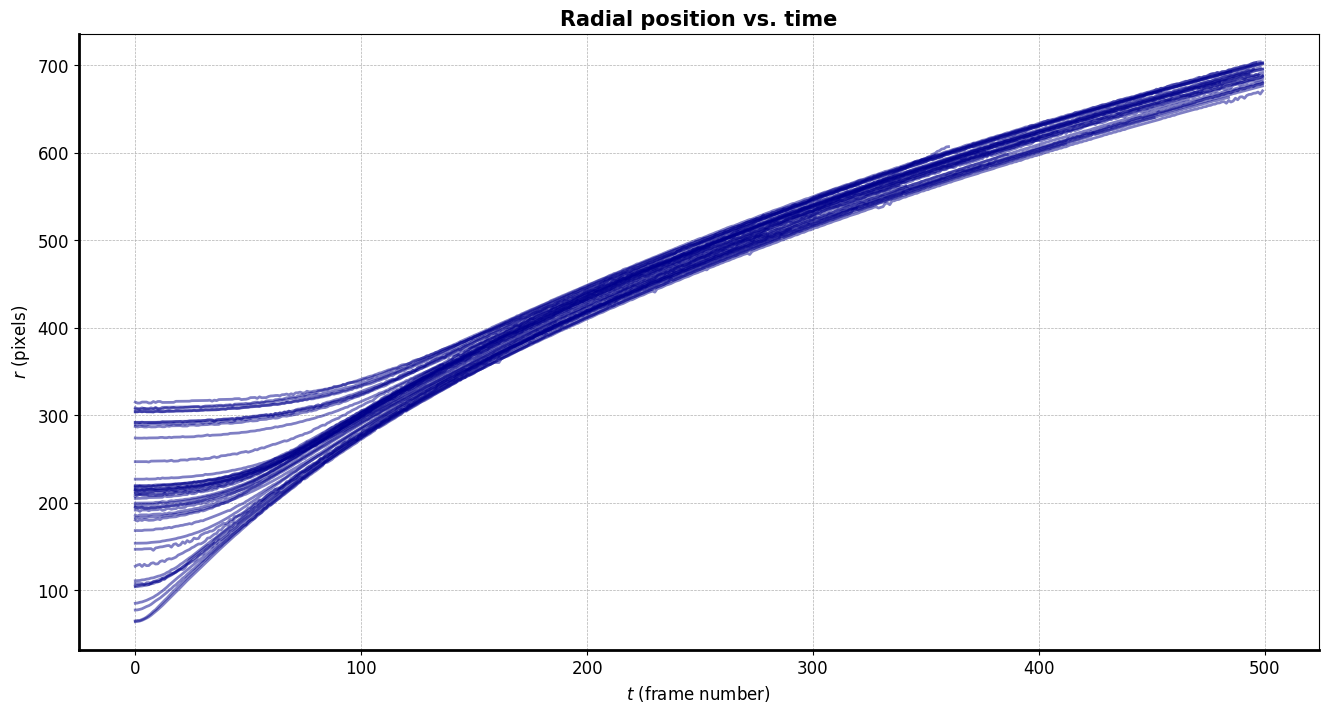

In [248]:
# Loop over each particle's data
plt.figure(figsize=(16, 8))
for i in range(len(r_array_per_particle)):
    x_array = [r_array_per_particle[i][j][1] for j in range(len(r_array_per_particle[i]))]
    y_array = [r_array_per_particle[i][j][0] for j in range(len(r_array_per_particle[i]))]
    plt.plot(x_array, y_array, label=f'Particle {i}', color="darkblue", alpha=0.5, linewidth=2)
    
plt.xlabel(r'$t$ (frame number)', fontsize=12)
plt.ylabel(r'$r$ (pixels)', fontsize=12)
plt.title('Radial position vs. time', fontsize=15, fontweight='bold')
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

print(f'Total trajectories found: {len(r_array_per_particle)}')

In [255]:
def position_speed(position_array):
    speed_array_per_particle = []
    for i in range(len(position_array)):
        interim = []
        for j in range(len(position_array[i]) - 1):
            interim.append((position_array[i][j + 1][0] - position_array[i][j][0], position_array[i][j + 1][0], position_array[i][j][1]))
        speed_array_per_particle.append(interim)
    return speed_array_per_particle

speed_array_per_particle = position_speed(r_array_per_particle)

In [257]:
print(speed_array_per_particle[0])

[(np.float64(-0.016383620485498795), np.float64(107.50299097607834), 0), (np.float64(0.03616199219476357), np.float64(107.5391529682731), 1), (np.float64(0.08235364184143634), np.float64(107.62150661011454), 2), (np.float64(-1.3247308283672794), np.float64(106.29677578174726), 3), (np.float64(2.230062274941858), np.float64(108.52683805668912), 4), (np.float64(0.12414223951311953), np.float64(108.65098029620223), 5), (np.float64(-1.2703572981986468), np.float64(107.38062299800359), 6), (np.float64(2.3494970779298114), np.float64(109.7301200759334), 7), (np.float64(0.9176861889362158), np.float64(110.64780626486962), 8), (np.float64(-1.224054872808864), np.float64(109.42375139206075), 9), (np.float64(0.9804846693382103), np.float64(110.40423606139896), 10), (np.float64(3.143602157397126), np.float64(113.54783821879609), 11), (np.float64(-1.1206333406196194), np.float64(112.42720487817647), 12), (np.float64(3.1831628694852014), np.float64(115.61036774766167), 13), (np.float64(1.0914907918

In [244]:
speed_array_per_time = []

def speed_per_time(speed_array):
    for i in range(last_frame):
        interim = []
        for j in speed_array:
            for k in j:
                if k[-1] == i:
                    interim.append(k)
        speed_array_per_time.append(interim)
    return speed_array_per_time
    
speed_array_per_time = speed_per_time(speed_array_per_particle)

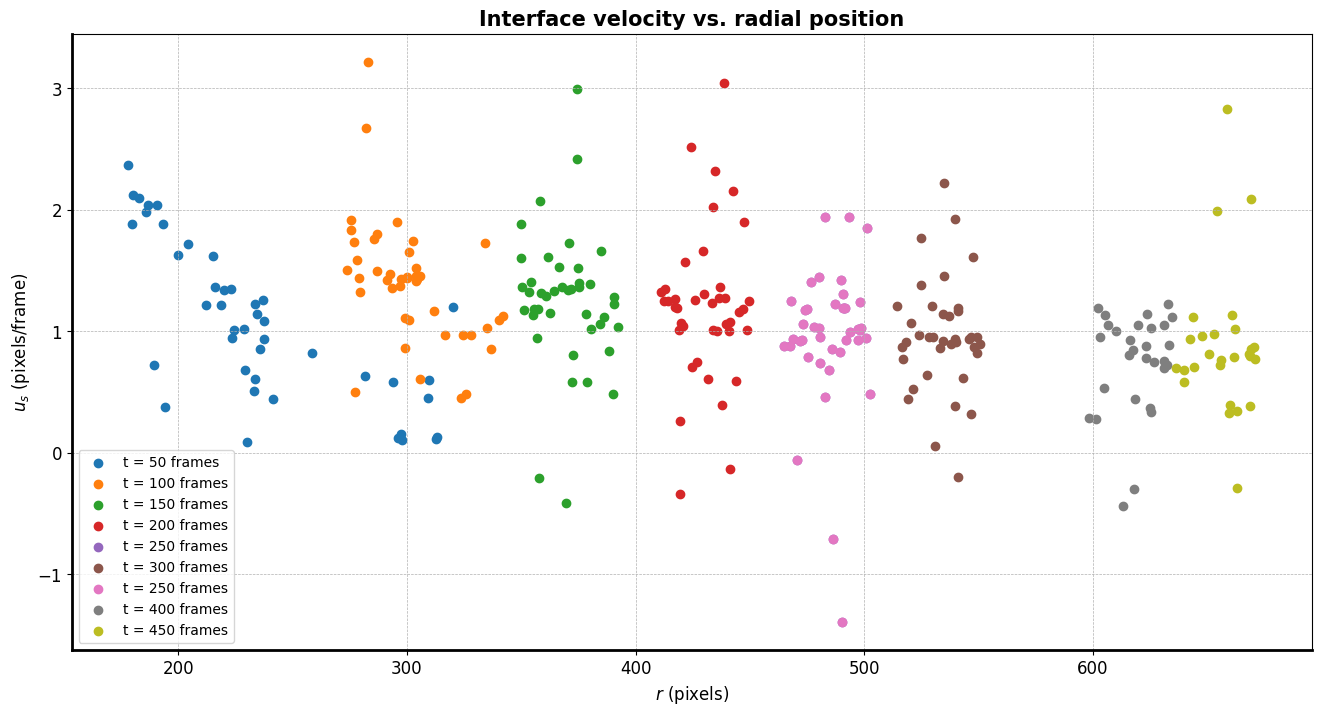

In [261]:
selection = np.linspace(50, len(speed_array_per_time) - 50, 5, dtype=int)
plt.figure(figsize=(16, 8))
for i in [50, 100, 150, 200, 250, 300, 250, 400, 450]:
    surface_velocity = [speed_array_per_time[i][j][0] for j in range(len(speed_array_per_time[i]))]
    surface_position = [speed_array_per_time[i][j][1] for j in range(len(speed_array_per_time[i]))]
    plt.scatter(surface_position, surface_velocity,  label='t = ' + str(i) + ' frames')
plt.legend()

plt.xlabel(r'$r$ (pixels)', fontsize=12)
plt.ylabel(r'$u_s$ (pixels/frame)', fontsize=12)
plt.title('Interface velocity vs. radial position', fontsize=15, fontweight='bold')
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# figure_directory = "C:/Users/escud/Desktop/Marangoni/Figures/D=60mm/"
# plt.savefig(figure_directory + "Speed_vs_radius_96_particles.jpeg", dpi=500, format='jpeg')
plt.show()